In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
batch1 = pickle.load(open(r'./Data/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch2 = pickle.load(open(r'./Data/batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [ ]:
#batch3 = pickle.load(open(r'./Data/batch3.pkl','rb'))
# remove noisy channels from batch3
#del batch3['b3c37']
#del batch3['b3c2']
#del batch3['b3c23']
#del batch3['b3c32']
#del batch3['b3c42']
#del batch3['b3c43']

In [ ]:
#numBat3 = len(batch3.keys())
#numBat3

40

In [ ]:
numBat = numBat1 + numBat2
numBat

124

In [ ]:
bat_dict = {**batch1, **batch2}

Text(0, 0.5, 'Discharge Capacity (Ah)')

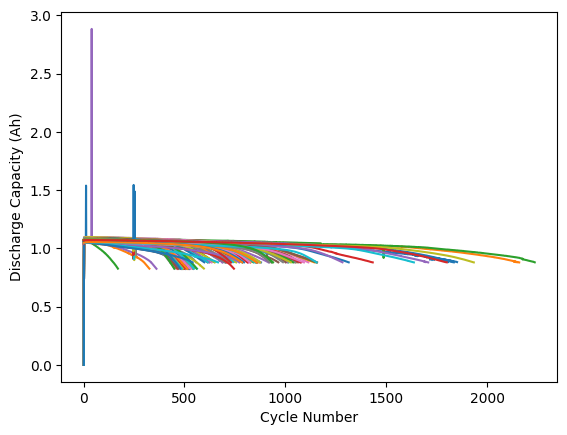

In [13]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [ ]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
#secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [ ]:
print(test_ind)
print(train_ind)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 83]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81]
[ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123]


In [16]:
#print(bat_dict["b1c0"]["cycles"])

In [ ]:
del batch1
del batch2

In [18]:
print(bat_dict["b1c3"]["summary"]["QC"])

[0.         1.0793147  1.0806946  ... 0.8812868  0.88089389 0.88050008]


In [19]:
check = []
index = []

for key in bat_dict.keys():
    for i in range(0, len(bat_dict[key]["summary"]["cycle"])):
        if bat_dict[key]["summary"]["QD"][i] <= 0.5:
            check.append(key)
            index.append(i)
            break

print(check)
print(index)

['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
q_nominal = 1.1

In [21]:
print(bat_dict["b3c3"]["cycles"]["0"].keys())
print(bat_dict["b3c3"]["summary"].keys())

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])
dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])


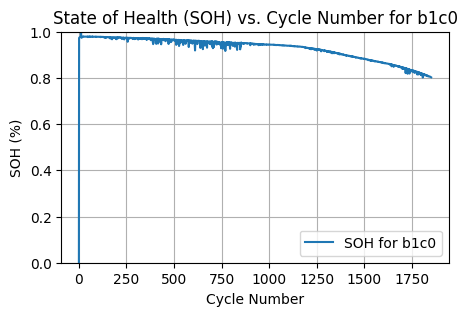

In [22]:
battery_id = "b1c0"

q_current = np.array(bat_dict[battery_id]['summary']['QD'])
cycles = np.array(bat_dict[battery_id]['summary']['cycle'])

soh = (q_current/q_nominal)

plt.figure(figsize=(5, 3))
plt.plot(cycles, soh, label=f'SOH for {battery_id}')
plt.title(f'State of Health (SOH) vs. Cycle Number for {battery_id}')
plt.xlabel('Cycle Number')
plt.ylabel('SOH (%)')
plt.ylim(bottom=0, top=1)
plt.grid(True)
plt.legend()
plt.show()

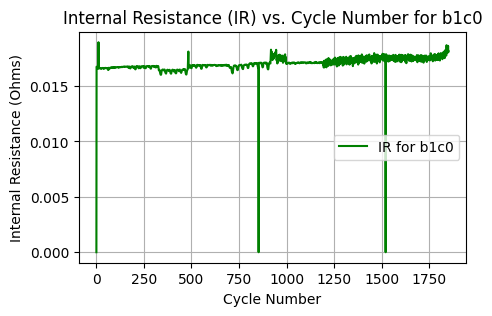

In [23]:
ir = np.array(bat_dict[battery_id]['summary']['IR'])

plt.figure(figsize=(5, 3))
plt.plot(cycles, ir, color='green', label=f'IR for {battery_id}')
plt.title(f'Internal Resistance (IR) vs. Cycle Number for {battery_id}')
plt.xlabel('Cycle Number')
plt.ylabel('Internal Resistance (Ohms)') # Or mOhms, check units if specified
plt.grid(True)
plt.legend()
plt.show()


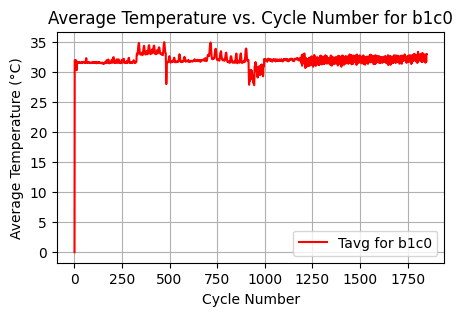

In [24]:
t_avg = np.array(bat_dict[battery_id]['summary']['Tavg'])

plt.figure(figsize=(5, 3))
plt.plot(cycles, t_avg, color='red', label=f'Tavg for {battery_id}')
plt.title(f'Average Temperature vs. Cycle Number for {battery_id}')
plt.xlabel('Cycle Number')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


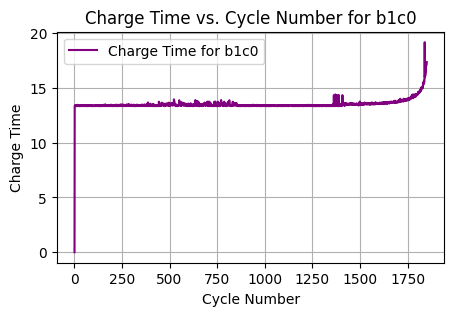

In [25]:
charge_time = np.array(bat_dict[battery_id]['summary']['chargetime'])

plt.figure(figsize=(5,3))
plt.plot(cycles, charge_time, color='purple', label=f'Charge Time for {battery_id}')
plt.title(f'Charge Time vs. Cycle Number for {battery_id}')
plt.xlabel('Cycle Number')
plt.ylabel('Charge Time')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
print(bat_dict["b1c0"]["summary"]["chargetime"])

[ 0.         13.34125    13.42577667 ... 17.04515833 17.15257333
 17.35889667]


In [ ]:
import gc
gc.collect()

In [ ]:
with open('bat_dict.pkl', 'wb') as f:
    pickle.dump(bat_dict, f)